# Star Wars Survey

In this project we will aim at answering questions about Star Wars fans. In particular:

-"does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?"

To do this, we collected 835 survey responses from the online tool SurveyMonkey. We will also firstly clean the dataset so that we can analyse it and share our findings.

# Objective
The objective of this analysis is to clean the data and answer which of the Star Wars movies are the most popular and well liked among the respondents of the survey.

# Read Data

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from IPython.display import Markdown as md

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [245]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [246]:
# Reviewing column names
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [247]:
star_war_movies = list(star_wars.iloc[0, 3:9])
star_war_movies

['Star Wars: Episode I  The Phantom Menace',
 'Star Wars: Episode II  Attack of the Clones',
 'Star Wars: Episode III  Revenge of the Sith',
 'Star Wars: Episode IV  A New Hope',
 'Star Wars: Episode V The Empire Strikes Back',
 'Star Wars: Episode VI Return of the Jedi']

# Cleaning and Mapping Yes/No Columns

In [248]:
# Convert the column to the Boolean type.

In [249]:
yes_no = {
    "Yes": True,
    "No": False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?']=star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)


In [250]:
# method2
for col in ['Have you seen any of the 6 films in the Star Wars franchise?',
            'Do you consider yourself to be a fan of the Star Wars film franchise?']:
    star_wars[col]=star_wars[col].map(yes_no)

In [251]:
#double check
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts())
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts())

Series([], Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64)
Series([], Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64)


# Cleaning and Mapping Checkbox Columns

In [252]:
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [253]:
# observe ccolumns
columns=['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']
star_wars[columns].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
3,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
4,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


In [254]:
movie_mapping ={
    "Star Wars: Episode I  The Phantom Menace":True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith":True,
    "Star Wars: Episode IV  A New Hope":True,
    "Star Wars: Episode V The Empire Strikes Back" : True,
    "Star Wars: Episode VI Return of the Jedi" : True,
    np.nan:False
}

for col in columns:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [255]:
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

In [256]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,NaN,NaN,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,NaN,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,NaN,NaN,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,NaN,NaN,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,NaN,NaN,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Cleaning the Ranking Columns

In [257]:
#Convert each of the columns above to a float type.
star_wars[star_wars.columns[9:15]]=star_wars[star_wars.columns[9:15]].astype(float)


In [258]:
# Give each column a more descriptive name.
star_wars = star_wars.rename(columns={
  'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10':'ranking_2',
     "Unnamed: 11": "ranking_3",
     "Unnamed: 12": "ranking_4",
     "Unnamed: 13": "ranking_5",
     "Unnamed: 14": "ranking_6"
})

star_wars.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

In [259]:
# method 2
# Store the column names as a list in rank_cols
rank_cols = star_wars.columns[9:15]

# Create a dictionary to contain replacement names for the ranking columns
rank_dict = {}
n = 0
for rank in rank_cols:
    n += 1
    rank_dict[rank] = 'ranking_{}'.format(n)
    

# Replace the column names of the ranking columns
star_wars.rename(columns=rank_dict, inplace=True)

star_wars.head()


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,NaN,NaN,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,NaN,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,NaN,NaN,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,NaN,NaN,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,NaN,NaN,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Finding the Highest-Ranked Movie

In [260]:
# Use the pandas.DataFrame.mean() method to compute the mean of each ranking columns from the previous screen.

In [261]:
rank_mean=star_wars[star_wars.columns[9:15]].mean()
rank_mean

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

In [262]:
# Make a bar chart of each column. 

In [263]:
%matplotlib inline
import matplotlib.pyplot as plt

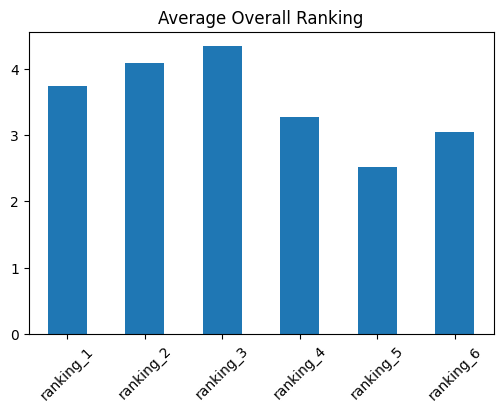

In [264]:
rank_mean.plot.bar(title='Average Overall Ranking')
plt.xticks(rotation = 45) 
plt.show()

So far we've cleaned the data, renamed several columns, and computed the average ranking of each movie. Since the ranking goes from highest (ie ranking_3) to lowest (ie ranking_5), it seems like the oldest movie (ie Star Wars: Episode V The Empire Strikes Back) is the one ranked higher comparing to the others. This confirms the hypothesis that the "original" movies are more acclaimed than the newest episodes.

# Finding the Most Viewed Movie

In [265]:
seen_number = star_wars[['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']].sum()

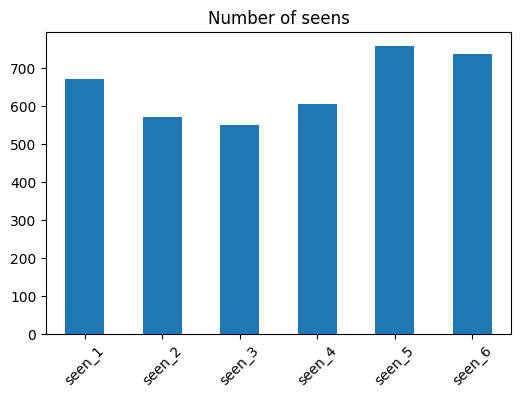

In [266]:
seen_number.plot.bar(title='Number of seens')
plt.xticks(rotation = 45) 
plt.show()

It looks like the most viewed movies are Star Wars: Episode V The Empire Strikes Back and Star Wars: Episode VI Return of the Jedi. This might be because, as shown by the rankings chart, a lot of people might have more chance to see a latest movie and people are having much more stricter review in nowadays.

# Exploring the Data by Binary Segments

In [267]:
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts(dropna=False)

No     641
Yes    427
NaN    118
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

In [268]:
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']=star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].map(yes_no)

In [269]:
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts(dropna=False)

False    641
True     427
NaN      118
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

In [272]:
segment_cols = ['Gender', 'Do you consider yourself to be a fan of the Star Wars film franchise?', 
                'Do you consider yourself to be a fan of the Star Trek franchise?']

# By Gender

In [270]:
star_war_movies = [re.split(r'[VI] ', m)[-1].strip() for m in star_war_movies]
star_war_movies

['The Phantom Menace',
 'Attack of the Clones',
 'Revenge of the Sith',
 'A New Hope',
 'The Empire Strikes Back',
 'Return of the Jedi']

In [273]:
segment_cols[0]

'Gender'

In [274]:
views_by_gender = star_wars.groupby(segment_cols[0])[['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']].mean()
views_by_gender

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Gender,,,,,,
Female,0.542805,0.431694,0.404372,0.464481,0.642987,0.615665
Male,0.726358,0.649899,0.637827,0.688129,0.788732,0.778672


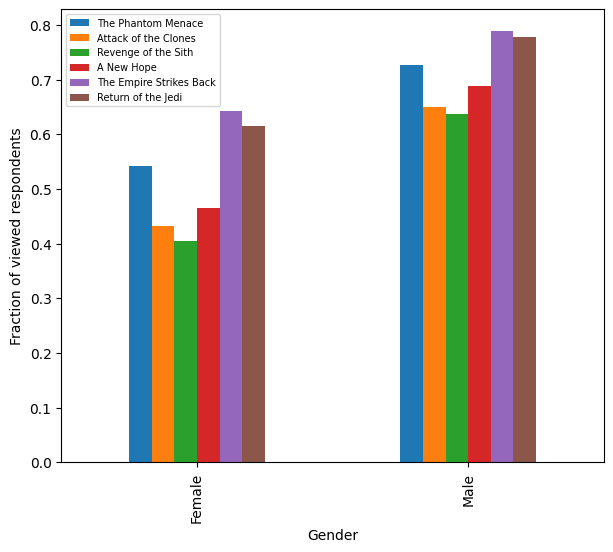

In [275]:
fig, ax = plt.subplots()

views_by_gender.plot.bar(figsize = (7,6), ax = ax)
plt.ylabel('Fraction of viewed respondents')
ax.legend(star_war_movies, prop = {'size': 7})

In [276]:
rankings_by_gender = star_wars.groupby(segment_cols[0])[['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']].mean()
rankings_by_gender

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Gender,,,,,,
Female,0.542805,0.431694,0.404372,0.464481,0.642987,0.615665
Male,0.726358,0.649899,0.637827,0.688129,0.788732,0.778672


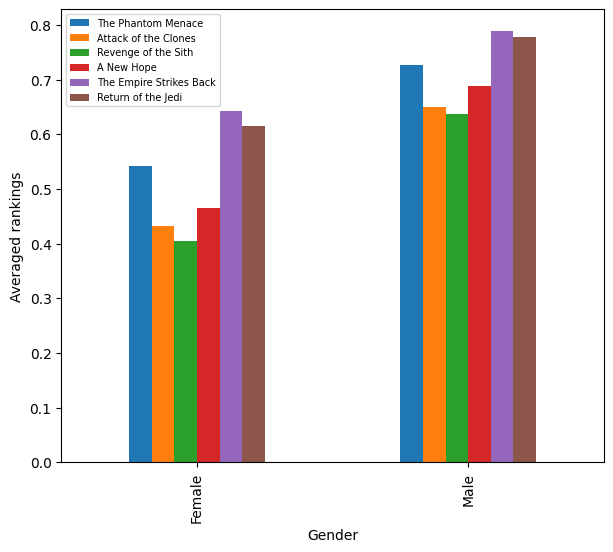

In [278]:
fig, ax = plt.subplots()

rankings_by_gender.plot.bar(figsize = (7,6), ax = ax)
plt.ylabel('Averaged rankings')
ax.legend(star_war_movies, prop = {'size': 7})